Importing all the Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes =True)
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

Importing the Dataset

In [2]:
data = pd.read_csv("data/diabetes.csv")

Preview of Dataset

In [3]:
data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35,125,33.6,0.627,50,1
1,1,85.0,66.000000,29,125,26.6,0.351,31,0
2,8,183.0,64.000000,29,125,23.3,0.672,32,1
3,1,89.0,66.000000,23,94,28.1,0.167,21,0
4,0,137.0,40.000000,35,168,43.1,2.288,33,1
5,5,116.0,74.000000,29,125,25.6,0.201,30,0
6,3,78.0,50.000000,32,88,31.0,0.248,26,1
7,10,115.0,72.405184,29,125,35.3,0.134,29,0
8,2,197.0,70.000000,45,543,30.5,0.158,53,1
9,8,125.0,96.000000,29,125,32.3,0.232,54,1


In [4]:
data.shape

(768, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


**EDA**

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.00000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.25000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.000000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.000000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.300000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.00000,1.00


**Removal of Zeros**\
\
Since there are many zeros in data and values of 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI' cannot be zero,
Therefore, Converiting Zeros into NaN value

In [7]:
data_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [8]:
data[data_zeros] = np.where((data[data_zeros] == 0), np.nan, data[data_zeros])

In [9]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Handling Missing Values**\
\
Filling NaN values with suitable mean and median values

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.00000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.25000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.000000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.000000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.300000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.00000,1.00


In [36]:
data['Glucose'] = data['Glucose'].fillna(data['Glucose'].mean())
data['BloodPressure'] = data['BloodPressure'].fillna(data['BloodPressure'].mean())
data['SkinThickness'] = data['SkinThickness'].fillna(data['SkinThickness'].median())
data['Insulin'] = data['Insulin'].fillna(data['Insulin'].median())
data['BMI'] = data['BMI'].fillna(data['BMI'].median())

In [12]:
data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.000000,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.000000,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.000000,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.000000,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.000000,29.0,125.0,25.6,0.201,30,0
6,3,78.0,50.000000,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.405184,29.0,125.0,35.3,0.134,29,0
8,2,197.0,70.000000,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.000000,29.0,125.0,32.3,0.232,54,1


NEW UPDATED DATASET

In [13]:
data.to_csv(r'updates_dataset.csv')

**Pair Plot to see Distribution of all data at a time and dependencies**

**Heat Map**\
\
Gives Relation of different attribute with each other

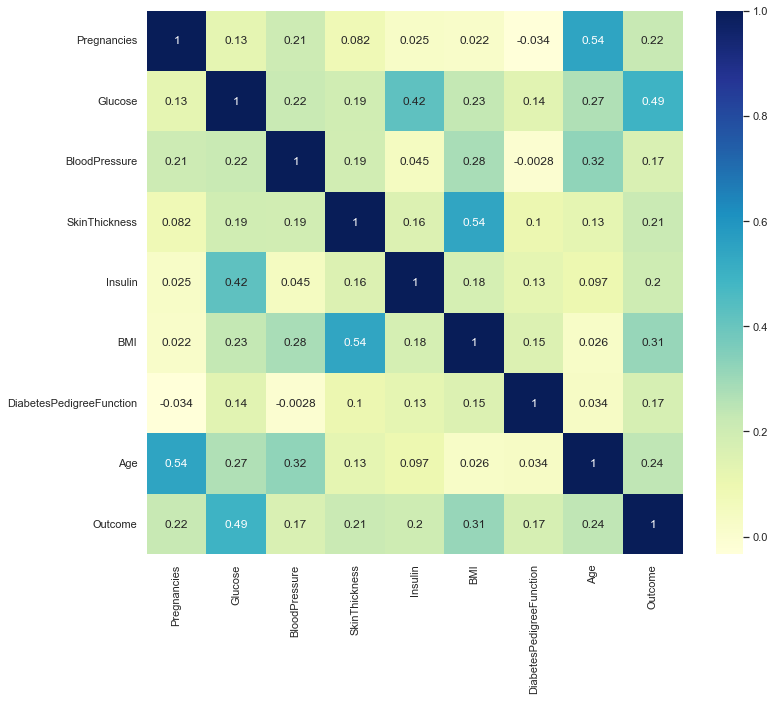

In [14]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot = True, cmap = "YlGnBu")
plt.show()

PLOTTING HISTOGRAM AND BOX PLOT FOR ALL ATRRIBUTES

# Machine Learning Models

1. **DECISION TREE**

Splitting Dataset into Train and Test.

Building and Training the Model.

In [15]:
X=data.iloc[:,0:8].values
y=data.iloc[:,8].values

from sklearn.preprocessing import LabelEncoder
y= LabelEncoder().fit_transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

from sklearn.tree import DecisionTreeClassifier
classifier_tree = DecisionTreeClassifier(criterion ='entropy',random_state=0)
classifier_tree.fit(X_train,y_train)
#
pickle_out = open("classifier_tree.pkl", "wb") 
pickle.dump(classifier_tree, pickle_out) 
pickle_out.close()

(614, 8) (154, 8) (614,) (154,)


Training Completed 

Confusion Matrix

In [16]:
Y_pred = classifier_tree.predict(X_test)

from  sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test,Y_pred)
print(cm1)

[[78 29]
 [18 29]]


**ACCURACY, PRECISION, RECALL**

In [17]:
print("Accuracy of the Model is : ",(cm1[0][0]+cm1[1][1])*100/(cm1[0][0]+cm1[1][1]+cm1[0][1]+cm1[1][0]))
print("Precision of the Model is : ",(cm1[0][0])*100/(cm1[0][0]+cm1[1][0]))
print("Recall of the Model is : ",(cm1[0][0])*100/(cm1[0][0]+cm1[0][1]))

acc_x1 = (cm1[0][0]+cm1[1][1])*100/(cm1[0][0]+cm1[1][1]+cm1[0][1]+cm1[1][0])
pre_x1 = (cm1[0][0])*100/(cm1[0][0]+cm1[1][0]) 
rec_x1 = (cm1[0][0])*100/(cm1[0][0]+cm1[0][1])

Accuracy of the Model is :  69.48051948051948
Precision of the Model is :  81.25
Recall of the Model is :  72.89719626168224


PLOTTING DECISION TREE FOR THE DATASET

|--- feature_1 <= 0.06
|   |--- feature_5 <= -0.88
|   |   |--- feature_4 <= -1.06
|   |   |   |--- feature_1 <= -0.58
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  -0.58
|   |   |   |   |--- class: 1
|   |   |--- feature_4 >  -1.06
|   |   |   |--- class: 0
|   |--- feature_5 >  -0.88
|   |   |--- feature_7 <= -0.42
|   |   |   |--- feature_3 <= -0.08
|   |   |   |   |--- feature_5 <= 0.01
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_5 >  0.01
|   |   |   |   |   |--- feature_6 <= 0.85
|   |   |   |   |   |   |--- feature_2 <= 0.74
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_2 >  0.74
|   |   |   |   |   |   |   |--- feature_5 <= 0.83
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_5 >  0.83
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_6 >  0.85
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  -0.08
|   |   |   |   |--- feature_

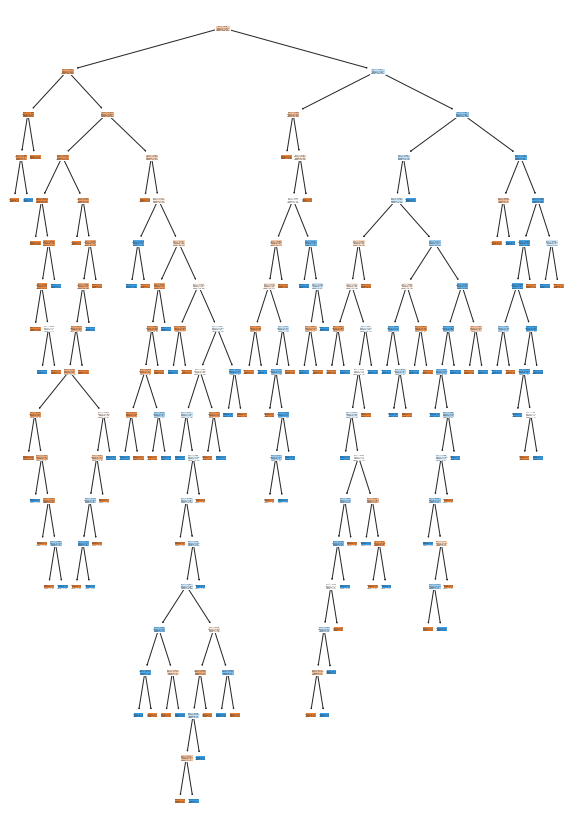

In [35]:
from sklearn import tree
from sklearn.tree import export_text

r=export_text(classifier_tree)
print(r)
fig=plt.figure(figsize=(10,15))
_=tree.plot_tree(classifier_tree,filled=True)

2. **K NEAREST NEIGHBORS CLASSIFIER**

Building and Training the Model.

In [20]:
X=data.iloc[:,0:8].values
y=data.iloc[:,8].values
#
from sklearn.preprocessing import LabelEncoder
y= LabelEncoder().fit_transform(y)
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=0)
#
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
classifier_knn.fit(X_train,y_train)

pickle_out = open("classifier_knn.pkl", "wb") 
pickle.dump(classifier_knn, pickle_out) 
pickle_out.close()

Training Completed 

Confusion Matrix

In [21]:
Y_pred = classifier_knn.predict(X_test)
#
from  sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test,Y_pred)
print(cm2)

[[89 18]
 [16 31]]


**ACCURACY, PRECISION, RECALL**

In [22]:
print("Accuracy of the Model is : ",(cm2[0][0]+cm2[1][1])*100/(cm2[0][0]+cm2[1][1]+cm2[0][1]+cm2[1][0]))
print("Precision of the Model is : ",(cm2[0][0])*100/(cm2[0][0]+cm2[1][0]))
print("Recall of the Model is : ",(cm2[0][0])*100/(cm2[0][0]+cm2[0][1]))

acc_x2 = (cm2[0][0]+cm2[1][1])*100/(cm2[0][0]+cm2[1][1]+cm2[0][1]+cm2[1][0])
pre_x2 = (cm2[0][0])*100/(cm2[0][0]+cm2[1][0])
rec_x2 = (cm2[0][0])*100/(cm2[0][0]+cm2[0][1])

Accuracy of the Model is :  77.92207792207792
Precision of the Model is :  84.76190476190476
Recall of the Model is :  83.17757009345794


**PLOTTING K-NEIGHBORS CLASSIFIER FOR THE DATASET**


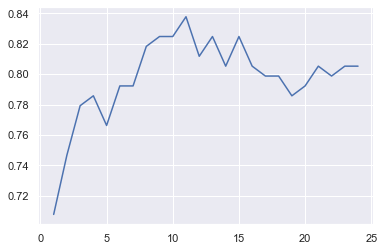

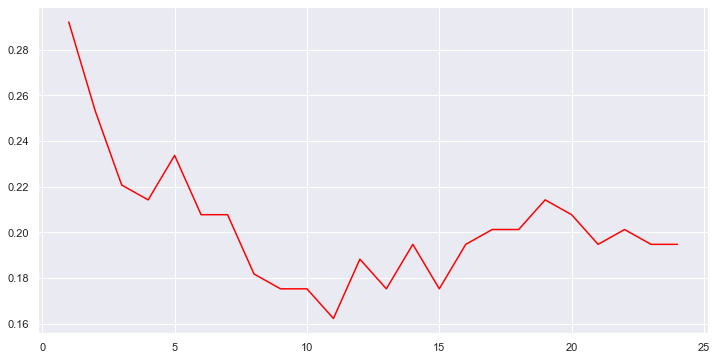

In [41]:
from sklearn import metrics

scores={}
scores_list=[]
error=[]
for i in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    scores[i]=metrics.accuracy_score(y_test,pred_i)
    scores_list.append(metrics.accuracy_score(y_test,pred_i))
plt.plot(range(1,25),scores_list)
plt.figure(figsize=(12, 6))
plt.plot(range(1, 25), error, color='red')

3. **LOGISTIC REGRESSION**

Building and Training the Model.

In [24]:
data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.000000,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.000000,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.000000,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.000000,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.000000,29.0,125.0,25.6,0.201,30,0
6,3,78.0,50.000000,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.405184,29.0,125.0,35.3,0.134,29,0
8,2,197.0,70.000000,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.000000,29.0,125.0,32.3,0.232,54,1


In [25]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [43]:
X=data.iloc[:,0:8].values
y=data.iloc[:,8].values
#
from sklearn.preprocessing import LabelEncoder
y= LabelEncoder().fit_transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=0)

from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)


from sklearn.linear_model import LogisticRegression
classifier_log = LogisticRegression()
classifier_log.fit(X_train,y_train)
#
pickle_out = open("classifier_log.pkl", "wb") 
pickle.dump(classifier_log, pickle_out) 
pickle_out.close()


Confusion Matrix

In [27]:
Y_pred = classifier_log.predict(X_test)
print(Y_pred)

from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_test,Y_pred)
print(cm3)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0]
[[95 12]
 [20 27]]


**ACCURACY, PRECISION, RECALL**

In [28]:
print("Accuracy of the Model is : ",(cm3[0][0]+cm3[1][1])*100/(cm3[0][0]+cm3[1][1]+cm3[0][1]+cm3[1][0]))
print("Precision of the Model is : ",(cm3[0][0])*100/(cm3[0][0]+cm3[1][0]))
print("Recall of the Model is : ",(cm3[0][0])*100/(cm3[0][0]+cm3[0][1]))

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, Y_pred))

acc_x3 = (cm3[0][0]+cm3[1][1])*100/(cm3[0][0]+cm3[1][1]+cm3[0][1]+cm3[1][0])
pre_x3 = (cm3[0][0])*100/(cm3[0][0]+cm3[1][0])
rec_x3 = (cm3[0][0])*100/(cm3[0][0]+cm3[0][1])

Accuracy of the Model is :  79.22077922077922
Precision of the Model is :  82.6086956521739
Recall of the Model is :  88.78504672897196
0.7922077922077922


**PLOTTING LOGISTIC REGRESSION FOR THE DATASET**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


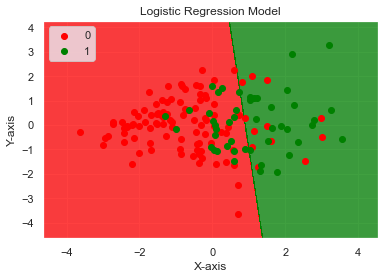

In [53]:
from matplotlib.colors import ListedColormap
X_set,y_set=X_test,y_test
X1,X2= np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75,cmap =ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],c=ListedColormap(('red','green'))(i),label=j)
plt.title('Logistic Regression Model')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()


4. **RANDOM FOREST CLASSIFIER**

Building and Training the Model.

In [31]:
X=data.iloc[:,0:8].values
y=data.iloc[:,8].values
#
from sklearn.preprocessing import LabelEncoder
y= LabelEncoder().fit_transform(y)
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=0)
#
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
classifier_random = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
classifier_random.fit(X_train,y_train)
#
pickle_out = open("classifier_random.pkl", "wb") 
pickle.dump(classifier_random, pickle_out) 
pickle_out.close()

Training Completed 

Confusion Matrix

In [32]:
Y_pred = classifier_random.predict(X_test)

from  sklearn.metrics import confusion_matrix
cm5 = confusion_matrix(y_test,Y_pred)
print(cm5)

[[95 12]
 [22 25]]


**ACCURACY, PRECISION, RECALL**

In [55]:
print("Accuracy of the Model is : ",(cm5[0][0]+cm5[1][1])*100/(cm5[0][0]+cm5[1][1]+cm5[0][1]+cm5[1][0]))
print("Precision of the Model is : ",(cm5[0][0])*100/(cm5[0][0]+cm5[1][0]))
print("Recall of the Model is : ",(cm5[0][0])*100/(cm5[0][0]+cm5[0][1]))

acc_x5 = (cm5[0][0]+cm5[1][1])*100/(cm5[0][0]+cm5[1][1]+cm5[0][1]+cm5[1][0])
pre_x5 = (cm5[0][0])*100/(cm5[0][0]+cm5[1][0])
rec_x5 = (cm5[0][0])*100/(cm5[0][0]+cm5[0][1])

Accuracy of the Model is :  77.92207792207792
Precision of the Model is :  81.19658119658119
Recall of the Model is :  88.78504672897196


**PLOTTING RANDOM FOREST
 CLASSIFIER FOR THE DATASET**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


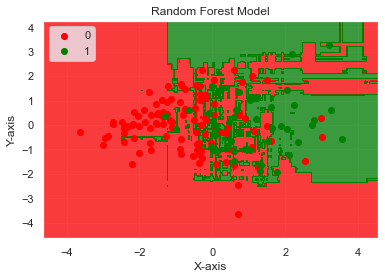

In [56]:
from sklearn.decomposition import PCA
pca= PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance= pca.explained_variance_ratio_
#
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)
#
Y_pred = classifier.predict(X_test)
#
from matplotlib.colors import ListedColormap
X_set,y_set=X_test,y_test
X1,X2= np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75,cmap =ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],c=ListedColormap(('red','green'))(i),label=j)
plt.title('Random Forest Model')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()




5. **SVM LINEAR**

Building and Training the Model.

In [59]:
X=data.iloc[:,0:8].values
y=data.iloc[:,8].values
#
from sklearn.preprocessing import LabelEncoder
y= LabelEncoder().fit_transform(y)
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=0)
#
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

from sklearn.svm import SVC
classifier_svm = SVC(kernel ='linear', random_state=0, probability = True)
classifier_svm.fit(X_train,y_train)
#
pickle_out = open("classifier_svm.pkl", "wb") 
pickle.dump(classifier_svm, pickle_out) 
pickle_out.close()

Training Completed 

Confusion Matrix

In [60]:
Y_pred = classifier_svm.predict(X_test)
#
from  sklearn.metrics import confusion_matrix
cm6 = confusion_matrix(y_test,Y_pred)
print(cm6)

[[97 10]
 [20 27]]


**ACCURACY, PRECISION, RECALL**

In [61]:
print("Accuracy of the Model is : ",(cm6[0][0]+cm6[1][1])*100/(cm6[0][0]+cm6[1][1]+cm6[0][1]+cm6[1][0]))
print("Precision of the Model is : ",(cm6[0][0])*100/(cm6[0][0]+cm6[1][0]))
print("Recall of the Model is : ",(cm6[0][0])*100/(cm6[0][0]+cm6[0][1]))
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, Y_pred))

acc_x6 = (cm6[0][0]+cm6[1][1])*100/(cm6[0][0]+cm6[1][1]+cm6[0][1]+cm6[1][0])
pre_x6 = (cm6[0][0])*100/(cm6[0][0]+cm6[1][0])
rec_x6 = (cm6[0][0])*100/(cm6[0][0]+cm6[0][1])

Accuracy of the Model is :  80.51948051948052
Precision of the Model is :  82.90598290598291
Recall of the Model is :  90.65420560747664
0.8051948051948052



**PLOTTING SVM LINEAR FOR THE DATASET**


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


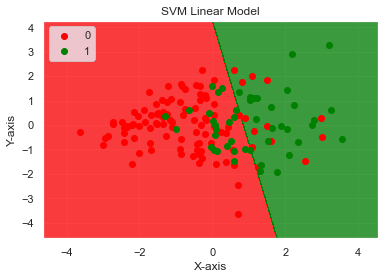

In [62]:
from sklearn.decomposition import PCA
pca= PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance= pca.explained_variance_ratio_
#
from sklearn.svm import SVC
classifier = SVC(kernel ='linear', random_state=0)
classifier.fit(X_train,y_train)
#
Y_pred = classifier.predict(X_test)
#
from matplotlib.colors import ListedColormap
X_set,y_set=X_test,y_test
X1,X2= np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75,cmap =ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],c=ListedColormap(('red','green'))(i),label=j)
plt.title('SVM Linear Model')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()


**COMAPRISION TABLE FOR ALL THE MACHINE LEARNING ALGORITHM**

In [63]:
acc = [acc_x1, acc_x2, acc_x3, acc_x5, acc_x6]
pre = [pre_x1, pre_x2, pre_x3, pre_x5, pre_x6]
rec = [rec_x1, rec_x2, rec_x3, rec_x5, rec_x6]
ml = ["Decision Tree", "KNN", "Logistic Regression", "Random Forest", "SVM"]

print("Accuracy:")
for i in range(5):
      print(acc[i], ":\t", ml[i])
print()
print("Precision:")
for i in range(5):
      print(pre[i], ":\t", ml[i])
print()
print("Recall:")
for i in range(5):
      print(rec[i], ":\t", ml[i])

Accuracy:
69.48051948051948 :	 Decision Tree
77.92207792207792 :	 KNN
79.22077922077922 :	 Logistic Regression
77.92207792207792 :	 Random Forest
80.51948051948052 :	 SVM

Precision:
81.25 :	 Decision Tree
84.76190476190476 :	 KNN
82.6086956521739 :	 Logistic Regression
81.19658119658119 :	 Random Forest
82.90598290598291 :	 SVM

Recall:
72.89719626168224 :	 Decision Tree
83.17757009345794 :	 KNN
88.78504672897196 :	 Logistic Regression
88.78504672897196 :	 Random Forest
90.65420560747664 :	 SVM
